<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/ANN(Back_Propagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN - Artificial Neural Network (Back Propagation)**

In [86]:
!pip install tensorflow

In [87]:
!pip install keras

In [88]:
#Importing Libraries
import numpy as np
import pandas as pd

In [89]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [90]:
#dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('/content/pima-indians-diabetes.data.csv', names=names)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
#splitting
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
x.shape

(768, 8)

In [93]:
x_train.shape

(614, 8)

In [94]:
len(df)

768

In [95]:
#Creating Neural Network model

model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))   #1st layer(input layer)
model.add(Dense(10,activation='relu'))                 #2nd layer
model.add(Dense(10,activation='relu'))                 #3rd layer
model.add(Dense(1,activation='sigmoid'))               #4th layer(output layer)

In [96]:
#compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#Fit the model
history = model.fit(x_train, y_train, validation_split=0.33, epochs=400, batch_size=20)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6374 - loss: 10.3476 - val_accuracy: 0.6601 - val_loss: 3.5095
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6221 - loss: 2.8136 - val_accuracy: 0.5172 - val_loss: 1.0506
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5885 - loss: 0.9144 - val_accuracy: 0.6207 - val_loss: 0.9153
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6508 - loss: 0.8247 - val_accuracy: 0.5813 - val_loss: 0.8429
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6329 - loss: 0.7960 - val_accuracy: 0.5961 - val_loss: 0.7816
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6764 - loss: 0.7222 - val_accuracy: 0.6010 - val_loss: 0.7681
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6806 - loss: 0.6886 - val_accuracy: 0.5813 - val_loss: 0.7493
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6783 - loss: 0.6697 - val_accuracy: 0.5911 

In [99]:
#Evaluate the model
scores = model.evaluate(x_train, y_train)
print(model.metrics_names[1], scores[1]*100)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4009 
compile_metrics 77.52442955970764


In [100]:
#Visualize training history
#list all data in history
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

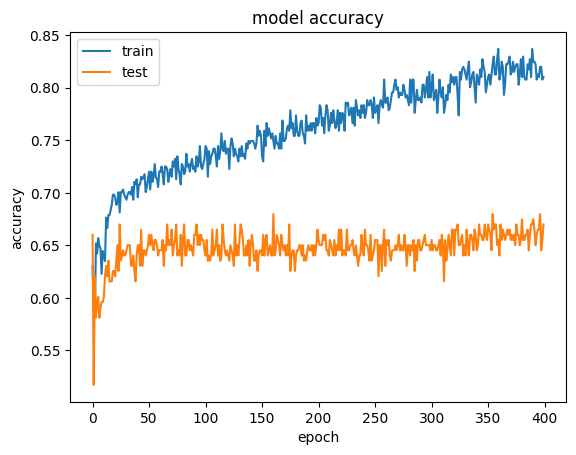

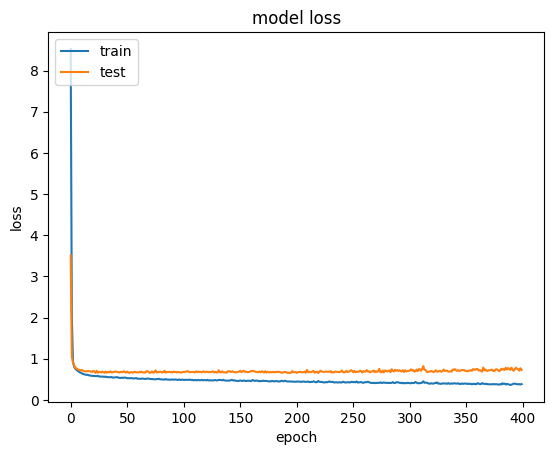

In [101]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
#Evaluating model on testing data
scores = model.evaluate(x_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7511 - loss: 0.7608 
compile_metrics: 73.38%
